In [1]:
#Carga de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as mode

In [2]:
#Carga de archivo CSV
data= pd.read_csv("airbnb.csv", encoding= 'ISO-8859-1')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [3]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

id                                    0
name                                  3
host_id                               0
host_name                             7
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [4]:
data2= data.copy()

3. APLICAR LOS SIGUIENTES MÉTODOS PARA REEMPLAZAR VALORES NULOS EN CADA COLUMNA:

In [5]:
#“host_name”: Rellenar con el objeto "anterior" de la columna
data2["host_name"]= data2["host_name"].fillna(method='bfill')

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data2["neighbourhood"]= data2["neighbourhood"].fillna(method='ffill')

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data2["neighbourhood_group"]= data2["neighbourhood_group"].fillna('Desconocido')

#“latitude”: Rellenar con el valor de “Media” de la columna
data2["latitude"]=data2["latitude"].fillna(round(data2["latitude"].mean(),1))

#“longitude”: Rellenar con el valor de “Mediana” de la columna
data2["longitude"]=data2["longitude"].fillna(round(data2["longitude"].median(),1))

#“room_type”: Rellenar con el string “Private room”
data2['room_type']=data2['room_type'].fillna('Private room')

#“price”: Rellenar con el valor de “Media” de la columna
data2["price"]=data2["price"].fillna(round(data2["price"].mean(),1))

#“minimum_nights”: Rellenar con el valor de “1”
data2['minimum_nights']=data2['minimum_nights'].fillna(1)

#"number_of_reviews": Rellenar con el valor de “0”
data2['number_of_reviews']=data2['number_of_reviews'].fillna(0)

#"last_review":Rellenar con el objeto "31/12/2022" de la columna
data2["last_review"]=data2["last_review"].fillna('31/12/2022')

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
data2["reviews_per_month"]=data2["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),1))

#"calculated_host_listings_count": Rellenar con el valor de “1”
data2['calculated_host_listings_count']=data2['calculated_host_listings_count'].fillna(1)

#"availability_365" y "number of reviews ltm": Rellenar con el objeto "anterior" de cada columna, respectivamente.
data2["availability_365"]= data2["availability_365"].fillna(method='bfill')

data2["number_of_reviews_ltm"]= data2["number_of_reviews_ltm"].fillna(method='bfill')

In [6]:
#Identificación de valores nulos
null=data2.isnull(). sum()
null

id                                0
name                              3
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

4. APLICAR MÉTODO DE DISTRIBUCIÓN NORMAL PARA IDENTIFICAR OUTLIERS, TOMANDO COMO LÍMITES 3 DESVIACIONES ESTÁNDAR, EXCULSIVAMENTE PARA LAS COLUMNAS 'latitude', 'longitude', 'price', 'minimum_nigths', 'number_of_reviews', 'reviews_per month' Y 'availability_365'.
OBTENER LOS DIAGRAMAS DE CAJA DE CAJA COLUMNA RESPECTIVAMENTE.

In [7]:
#Creación de una copia para la base de datos
copia = data2.copy()

LATITUDE

In [8]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna “latitude"
reto2=copia["latitude"]
limitesuperior=reto2.mean()+3*reto2.std()
limiteinferior=reto2.mean()-3*reto2.std()
print("Limite superior permitido",limitesuperior)
print("Limite inferior permitido",limiteinferior)

Limite superior permitido 22.0250088466136
Limite inferior permitido 16.795011725586317


In [9]:
#Identificación de Outliers
outliers_latitude= copia [(reto2>limitesuperior) | (reto2<limiteinferior)]
outliers_latitude

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12741,46757982.0,Residencia Master Suite con Terraza,375169008,Residencias,Desconocido,Benito JuÃ¡rez,99.39291,-99.17623,Entire home/apt,3678.0,2.0,0.0,31/12/2022,1.60,25.0,337.0,0.0
21665,22107097.0,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.50787,-99.22067,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0


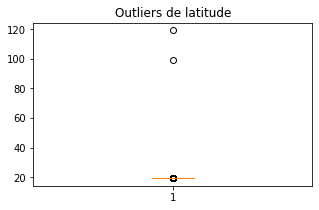

In [10]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #diagrama para visualizar outliers

LONGITUDE

In [11]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "longitude"
r3=copia["longitude"]
limitesuperior2=r3.mean()+3*r3.std()
limiteinferior2=r3.mean()-3*r3.std()
print("Limite superior permitido",limitesuperior2)
print("Limite inferior permitido",limiteinferior2)

Limite superior permitido -89.00097389354517
Limite inferior permitido -109.32865504999904


In [12]:
#Identificación de Outliers
outliers_longitude= copia [(r3>limitesuperior2) | (r3<limiteinferior2)]
outliers_longitude

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12003,45519073.0,Spacious 3BR/3.5BATH in heart of Condesa,2593419,Katie,Desconocido,CuauhtÃ©moc,19.41882,-399.17598,Entire home/apt,3040.0,3.0,48.0,22/05/2022,2.65,1.0,165.0,44.0
12009,45454474.0,Bonito departamento cerca del Ãngel,303864680,Leidi Laura,Desconocido,CuauhtÃ©moc,19.42738,299.16998,Entire home/apt,2670.0,1.0,6.0,09/01/2022,0.28,8.0,359.0,1.0


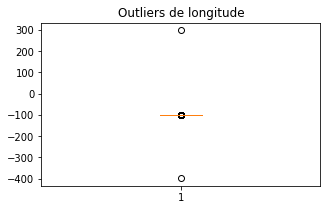

In [13]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #diagrama para visualizar outliers

PRICE

In [14]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "price"
r4=copia["price"]
limitesuperior3=r4.mean()+4*r4.std()
limiteinferior3=r4.mean()-4*r4.std()
print("Limite superior permitido",limitesuperior3)
print("Limite inferior permitido",limiteinferior3)

Limite superior permitido 34057.78312578311
Limite inferior permitido -31156.8169990583


In [15]:
#Identificación de Outliers
outliers_price= copia [(r4>limitesuperior3) | (r4<limiteinferior3)]
outliers_price

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2096,1.622930e+07,"Apartamento cerca de Carso, Antara, Polanco,",130445271,Mario,Desconocido,Miguel Hidalgo,19.44449,-99.20399,Entire home/apt,99998.0,2.0,83.0,29/11/2021,1.28,8.0,364.0,7.0
2125,1.639185e+07,Spacious apartment in the heart of the city!,26762960,Juan Antonio,Desconocido,CuauhtÃ©moc,19.42961,-99.15876,Entire home/apt,50000.0,1.0,27.0,01/05/2017,0.40,1.0,202.0,0.0
2513,1.794602e+07,"Antara, Polanco, Carso, Apartamento.",130445271,Mario,Desconocido,Miguel Hidalgo,19.44167,-99.19749,Entire home/apt,57785.0,2.0,96.0,10/06/2022,1.51,8.0,358.0,3.0
3125,1.994540e+07,Master Suite,141354058,Suites,Desconocido,Miguel Hidalgo,19.42723,-99.19667,Hotel room,40386.0,1.0,11.0,06/11/2021,0.19,2.0,360.0,1.0
3265,2.058624e+07,Obelisk Suite 1 recÃ¡mara,141354058,Suites,Desconocido,Miguel Hidalgo,19.42838,-99.19739,Private room,40386.0,1.0,1.0,21/11/2018,0.02,2.0,361.0,0.0
4279,2.389552e+07,HabitaciÃ³n a 40min del centro historico,173103110,Ines,Desconocido,Iztapalapa,19.32899,-98.97697,Private room,350000.0,1.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
4315,2.349835e+07,"CASA EN PEDREGAL , COLONIAL MEXICANO",28935792,Paulina,Desconocido,Ãlvaro ObregÃ³n,19.32626,-99.20603,Entire home/apt,72568.0,160.0,0.0,31/12/2022,1.60,4.0,180.0,0.0
5345,2.795386e+07,Polarea Cc,130445271,Mario,Desconocido,Miguel Hidalgo,19.44648,-99.20367,Entire home/apt,99998.0,2.0,8.0,02/01/2019,0.18,8.0,365.0,0.0
6032,3.003987e+07,Rombo II,207171317,Casa,Desconocido,Cuajimalpa de Morelos,19.40241,-99.25584,Entire home/apt,40158.0,2.0,0.0,31/12/2022,1.60,2.0,202.0,0.0
6050,3.004331e+07,Rombo IV,207171317,Casa,Desconocido,Miguel Hidalgo,19.40271,-99.25364,Entire home/apt,56383.0,2.0,2.0,09/10/2019,0.06,2.0,81.0,0.0


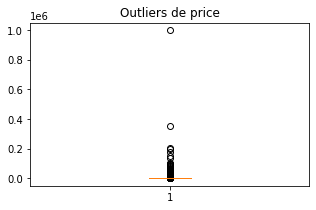

In [16]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["price"]) 
plt.title("Outliers de price")
plt.show() #diagrama para visualizar outliers

MINIMUM NIGHTS

In [17]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "minimum_nights"
r5=copia["minimum_nights"]
limitesuperior4=r5.mean()+4*r5.std()
limiteinferior4=r5.mean()-4*r5.std()
print("Limite superior permitido",limitesuperior4)
print("Limite inferior permitido",limiteinferior4)

Limite superior permitido 112.09524573978166
Limite inferior permitido -102.41265771080018


In [18]:
#Identificación de Outliers
outliers_minimum_n= copia [(r5>limitesuperior4) | (r5<limiteinferior4)]
outliers_minimum_n

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,826691.0,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
73,1187817.0,Suite 1 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,900.0,120.0,50.0,24/11/2018,0.45,6.0,364.0,0.0
169,525618.0,Beautiful Colonia Roma apartment,2566629,Alejandra & Billy,Desconocido,CuauhtÃ©moc,19.41588,-99.15981,Entire home/apt,2308.0,360.0,26.0,10/09/2018,0.22,1.0,264.0,0.0
183,1798108.0,Near park Mexico. Brilliant and renovated flat!,1595855,Yahir,Desconocido,CuauhtÃ©moc,19.41638,-99.16868,Entire home/apt,1171.0,180.0,8.0,09/05/2021,0.08,1.0,365.0,0.0
326,4604145.0,Suite 3 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.40904,-99.17327,Entire home/apt,800.0,179.0,20.0,07/01/2019,0.24,6.0,364.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21317,48096905.0,Se renta Suite,387846773,Gina,Desconocido,Cuajimalpa de Morelos,19.39884,-99.27079,Entire home/apt,385.0,365.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
21350,23741236.0,Interlomas Perfect Apartment,10358425,Penelope,Desconocido,Cuajimalpa de Morelos,19.38465,-99.29423,Entire home/apt,1806.0,180.0,8.0,26/02/2021,0.16,1.0,352.0,0.0
21527,17732363.0,DEPARTAMENTOS AMUEBLADOS,120918514,Fernando,Desconocido,Gustavo A. Madero,19.53648,-99.18892,Private room,250.0,180.0,0.0,31/12/2022,1.60,2.0,365.0,0.0
21545,31946858.0,Bonito cuarto privado para dama en La Florida,146368828,Alexandra,Desconocido,Azcapotzalco,19.49877,-99.23388,Private room,250.0,170.0,0.0,31/12/2022,1.60,1.0,365.0,0.0


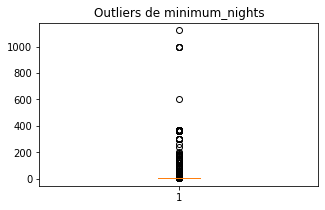

In [19]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #diagrama para visualizar outliers

NUMBER OF REVIEWS

In [20]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "number_of_reviews"
r6=copia["number_of_reviews"]
limitesuperior5=r6.mean()+4*r6.std()
limiteinferior5=r6.mean()-4*r6.std()
print("Limite superior permitido",limitesuperior5)
print("Limite inferior permitido",limiteinferior5)

Limite superior permitido 256.32320597118996
Limite inferior permitido -193.08696987353892


In [21]:
#Identificación de Outliers
outliers_number_reviews= copia [(r6>limitesuperior5) | (r6<limiteinferior5)]
outliers_number_reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
31,165772.0,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Desconocido,Miguel Hidalgo,19.408260,-99.186590,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.09,6.0,231.0,8.0
33,939721.0,Radiant Apartment with Terrace in Roma Norte,4821807,Alex,Desconocido,CuauhtÃ©moc,19.422880,-99.154880,Entire home/apt,1572.0,3.0,458.0,06/06/2022,4.09,4.0,171.0,49.0
35,997247.0,NEW! HISTORIC BUILDING -BEST STREET,5479592,Lorenzo,Desconocido,CuauhtÃ©moc,19.414340,-99.158570,Entire home/apt,1921.0,2.0,394.0,30/05/2022,3.56,1.0,327.0,34.0
36,2084093.0,5 min from CDMXÂ´s airport,10644799,Benito,Desconocido,Venustiano Carranza,19.439490,-99.087690,Entire home/apt,446.0,1.0,562.0,28/05/2022,5.92,6.0,354.0,24.0
48,1022380.0,Feel the Magic of Mexico City from this Duplex...,3285196,Juan Carlos,Desconocido,CuauhtÃ©moc,19.432710,-99.138570,Entire home/apt,1253.0,1.0,319.0,16/06/2022,2.85,7.0,302.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,51846693.0,Hotel El Senador HabitaciÃ³n Cama King,419920647,Jessica,Desconocido,CuauhtÃ©moc,19.416850,-99.145790,Private room,517.0,1.0,399.0,18/06/2022,40.44,5.0,363.0,399.0
16326,52769810.0,2BR Apt w/Balcony |Rooftop-FirePit+Best Views+Gym,335393886,Uliv,Desconocido,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,2104.0,1.0,286.0,19/06/2022,34.46,11.0,365.0,286.0
16327,52769824.0,Wonderful 2BR Apt |Polanco|2 Rooftops+Gym+B/Ce...,335393886,Uliv,Desconocido,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,1900.0,1.0,272.0,19/06/2022,32.64,11.0,365.0,272.0
16328,52769833.0,Cute & Intimate Apt | Gym+2 Rooftops+Fire Pit+...,335393886,Uliv,Desconocido,Miguel Hidalgo,19.438433,-99.192001,Entire home/apt,1612.0,1.0,277.0,18/06/2022,33.24,11.0,365.0,277.0


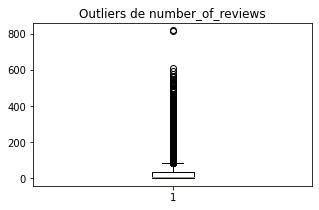

In [22]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #diagrama para visualizar outliers


REVIEWS PER MONTH

In [23]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "reviews_per_month"
r7=copia["reviews_per_month"]
limitesuperior6=r7.mean()+4*r7.std()
limiteinferior6=r7.mean()-4*r7.std()
print("Limite superior permitido",limitesuperior6)
print("Limite inferior permitido",limiteinferior6)

Limite superior permitido 8.868489109921253
Limite inferior permitido -5.691280193958356


In [24]:
#Identificación de Outliers
outliers_reviews_month= copia [(r7>limitesuperior6) | (r7<limiteinferior6)]
outliers_reviews_month

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3402,2.105230e+07,"Departamento, 10min del Aeropuerto de la CDMX",151657679,Rogelio,Desconocido,Iztacalco,19.411700,-99.067570,Entire home/apt,581.0,1.0,596.0,19/06/2022,10.38,1.0,162.0,107.0
3969,2.258021e+07,Casa colibrÃ­,165994413,Adriana,Desconocido,Cuajimalpa de Morelos,19.350970,-99.281240,Entire home/apt,800.0,1.0,9.0,16/06/2022,9.00,1.0,361.0,9.0
4230,2.364953e+07,"HabitaciÃ³n avant garde, con bella vista al ja...",70937648,Victor,Desconocido,CuauhtÃ©moc,19.449500,-99.161420,Private room,991.0,1.0,489.0,15/06/2022,9.36,17.0,233.0,140.0
4306,2.390458e+07,"Depa en dos plantas con amplia terraza, saniti...",70937648,Victor,Desconocido,CuauhtÃ©moc,19.449500,-99.161420,Entire home/apt,1900.0,1.0,501.0,19/06/2022,9.74,17.0,256.0,112.0
4446,2.399732e+07,5 min to Airport in a Safe and traditional area,175135834,Diana,Desconocido,Gustavo A. Madero,19.447770,-99.064150,Private room,422.0,1.0,465.0,02/06/2022,9.03,4.0,177.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19457,6.010000e+17,A5-HabitaciÃ³n a una cuadra de la Terminal 1 AICM,361986239,Gerardo Rodrigo,Desconocido,Venustiano Carranza,19.439045,-99.079597,Private room,290.0,1.0,25.0,15/06/2022,11.54,4.0,85.0,25.0
19653,6.090000e+17,3BR Penthouse in Polanco | Hot Tub/Terrace/Pool,5126969,Jose Alfonso,Desconocido,Miguel Hidalgo,19.441680,-99.202990,Entire home/apt,2542.0,1.0,22.0,19/06/2022,11.58,4.0,334.0,22.0
19770,6.130000e+17,Cousy room in the heart of Condesa neighborhood,455881748,Yula,Desconocido,CuauhtÃ©moc,19.407833,-99.171761,Private room,351.0,1.0,16.0,20/06/2022,10.67,2.0,350.0,16.0
20079,6.230000e+17,Impecable Studio |Unbeatable Location| Rooftop...,375454819,Uliv,Desconocido,CuauhtÃ©moc,19.407688,-99.173706,Entire home/apt,1544.0,1.0,15.0,19/06/2022,10.98,16.0,365.0,15.0


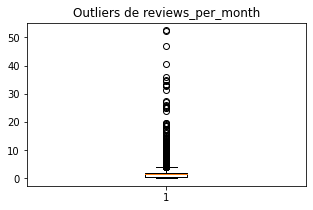

In [25]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #diagrama para visualizar outliers

AVAILABILITY 365

In [26]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "availability_365"
r8=copia["availability_365"]
limitesuperior7=r8.mean()+3*r8.std()
limiteinferior7=r8.mean()-3*r8.std()
print("Limite superior permitido",limitesuperior7)
print("Limite inferior permitido",limiteinferior7)

Limite superior permitido 612.4014586334399
Limite inferior permitido -125.45042259116755


In [28]:
#Identificación de Outliers
outliers_reviews_month= copia [(r8>limitesuperior7) | (r8<limiteinferior7)]
outliers_reviews_month

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15,2056638.0,Amplio y luminoso loft en CoyoacÃ¡n,10531228,Maria,Desconocido,CoyoacÃ¡n,19.35353,-99.16299,Entire home/apt,1602.0,1.0,21.0,24/06/2018,0.2,3.0,1290.0,0.0


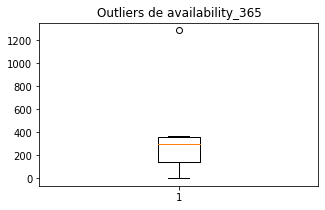

In [27]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #diagrama para visualizar outliers

5. APLICAR MÉTODO DE RANGO INTERCUARTÍLICO PARA IDENTIFICAR OUTLIERS, TOMANDO COMO LÍMITES 1.5 IQR, PARA LAS MISMAS COLUMNAS REALIZAR UN ANÁLISI COMPARATIVO DE AMBOS RESULTADOS.

LATITUDE

In [28]:
#Variable: latitude.

x2=copia["latitude"]

p25x2=x2.quantile(0.25) #Q1
p75x2=x2.quantile(0.75) #Q3
iqrx2 = p75x2 - p25x2 #Q3-Q1

LimiteSuperior_iqr_2 = p75x2 + 1.7*iqrx2
LimiteInferior_iqr_2 = p25x2 - 1.7*iqrx2
print("Limite superior permitido", LimiteSuperior_iqr_2)
print("Limite inferior permitido", LimiteInferior_iqr_2)

Limite superior permitido 19.518043000000006
Limite inferior permitido 19.293686999999995


In [29]:
#Identificación de Outliers
otlrs_latitude_iqr= copia [(x2>LimiteSuperior_iqr_2) | (x2<LimiteInferior_iqr_2)]
otlrs_latitude_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
96,329776.0,HabitaciÃ³n Verde.,1683373,Miguel,Desconocido,Tlalpan,19.27510,-99.17757,Private room,303.0,2.0,16.0,25/12/2021,0.27,5.0,0.0,1.0
194,609594.0,House in Xochimilco,2223274,Luis,Desconocido,Xochimilco,19.26541,-99.11365,Entire home/apt,608.0,21.0,12.0,06/10/2020,0.14,1.0,325.0,0.0
206,1920070.0,Mountain Oasis surrender by trees,9953466,Gabriela,Desconocido,Tlalpan,19.24444,-99.17044,Private room,417.0,1.0,3.0,27/10/2019,0.05,1.0,365.0,0.0
213,1945351.0,"Private room. Near COLMEX, UPN, FLACSO",340030,Griselda,Desconocido,Tlalpan,19.28356,-99.21837,Private room,608.0,3.0,2.0,26/01/2018,0.04,3.0,365.0,0.0
305,4519487.0,Recamara con entrada independiente,6604619,Tania,Desconocido,Tlalpan,19.26894,-99.17053,Private room,428.0,6.0,6.0,30/04/2021,0.08,2.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,47965554.0,Casa RAUL CRUZ,386639818,Raul,Desconocido,Azcapotzalco,19.52080,-99.21918,Entire home/apt,250.0,1.0,0.0,31/12/2022,1.60,1.0,356.0,0.0
21633,52621697.0,Departamento nuevo y reciÃ©n amueblado enfrent...,21515326,Roberto,Desconocido,Azcapotzalco,19.52240,-99.22512,Entire home/apt,1000.0,1.0,32.0,29/04/2022,3.76,2.0,358.0,32.0
21636,38257741.0,"Hospedaje Para 2 personas, en recamara privada.",215690013,David,Desconocido,Azcapotzalco,19.52869,-99.22087,Entire home/apt,432.0,2.0,4.0,26/11/2021,0.12,5.0,364.0,2.0
21638,52622073.0,Departamento Viveros del Lago.\nEnfrente de la...,21515326,Roberto,Desconocido,Azcapotzalco,19.52295,-99.22571,Entire home/apt,1000.0,1.0,25.0,05/06/2022,2.92,2.0,334.0,25.0


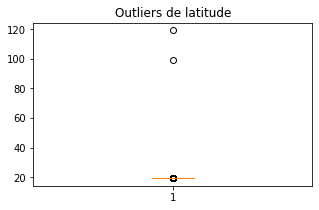

In [30]:
#Diagrama de caja: latitude.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #diagrama para visualizar outliers

LONGITUDE

In [31]:
#Variable: latitude.

x3=copia["latitude"]

p25x3=x3.quantile(0.25) #Q1
p75x3=x3.quantile(0.75) #Q3
iqrx3 = p75x3 - p25x3 #Q3-Q1

LimiteSuperior_iqr_3 = p75x3 + 1.5*iqrx3
LimiteInferior_iqr_3 = p25x3 - 1.5*iqrx3
print("Limite superior permitido", LimiteSuperior_iqr_3)
print("Limite inferior permitido", LimiteInferior_iqr_3)

Limite superior permitido 19.507845000000003
Limite inferior permitido 19.303884999999994


In [32]:
#Identificación de Outliers
otlrs_longitude_iqr= copia [(x3>LimiteSuperior_iqr_3) | (x3<LimiteInferior_iqr_3)]
otlrs_longitude_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
96,329776.0,HabitaciÃ³n Verde.,1683373,Miguel,Desconocido,Tlalpan,19.27510,-99.17757,Private room,303.0,2.0,16.0,25/12/2021,0.27,5.0,0.0,1.0
194,609594.0,House in Xochimilco,2223274,Luis,Desconocido,Xochimilco,19.26541,-99.11365,Entire home/apt,608.0,21.0,12.0,06/10/2020,0.14,1.0,325.0,0.0
206,1920070.0,Mountain Oasis surrender by trees,9953466,Gabriela,Desconocido,Tlalpan,19.24444,-99.17044,Private room,417.0,1.0,3.0,27/10/2019,0.05,1.0,365.0,0.0
213,1945351.0,"Private room. Near COLMEX, UPN, FLACSO",340030,Griselda,Desconocido,Tlalpan,19.28356,-99.21837,Private room,608.0,3.0,2.0,26/01/2018,0.04,3.0,365.0,0.0
277,3506037.0,SUITES BOSQUES MEDICA SUR,17650235,Chelita,Desconocido,CoyoacÃ¡n,19.29966,-99.15624,Private room,533.0,1.0,0.0,31/12/2022,1.60,3.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,52622073.0,Departamento Viveros del Lago.\nEnfrente de la...,21515326,Roberto,Desconocido,Azcapotzalco,19.52295,-99.22571,Entire home/apt,1000.0,1.0,25.0,05/06/2022,2.92,2.0,334.0,25.0
21646,33914551.0,Cozy depa,256115671,Atilio,Desconocido,Azcapotzalco,19.51632,-99.22004,Entire home/apt,393.0,2.0,77.0,02/06/2022,2.00,1.0,55.0,33.0
21652,39023239.0,Recamara privada cerca del metro Rosario,298373642,BenjamÃ­n,Desconocido,Azcapotzalco,19.51389,-99.20757,Private room,300.0,2.0,0.0,31/12/2022,1.60,1.0,176.0,0.0
21656,16928664.0,Hermosa habitaciÃ³n con baÃ±o privado,101147814,Sandra,Desconocido,Azcapotzalco,19.50816,-99.22190,Private room,579.0,1.0,1.0,06/04/2018,0.02,1.0,87.0,0.0


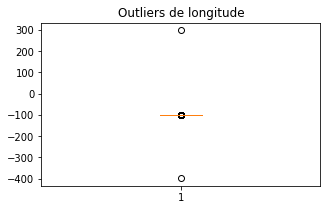

In [33]:
#Diagrama de caja: longitude.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #diagrama para visualizar outliers

PRICE

In [34]:
#Variable: price.

x4=copia["price"]

p25x4=x4.quantile(0.25) #Q1
p75x4=x4.quantile(0.75) #Q3
iqrx4 = p75x4 - p25x4 #Q3-Q1

LimiteSuperior_iqr_4 = p75x4 + 1.5*iqrx4
LimiteInferior_iqr_4 = p25x4 - 1.5*iqrx4
print("Limite superior permitido", LimiteSuperior_iqr_4)
print("Limite inferior permitido", LimiteInferior_iqr_4)

Limite superior permitido 2960.0
Limite inferior permitido -976.0


In [35]:
#Identificación de Outliers
otlrs_price_iqr= copia [(x4>LimiteSuperior_iqr_4) | (x4<LimiteInferior_iqr_4)]
otlrs_price_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,3.579700e+04,Villa Dante,153786,Dici,Desconocido,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.60,1.0,363.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.41162,-99.17794,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
28,1.070780e+05,NEW DESIGNER LOFT,540705,Andrea,Desconocido,Miguel Hidalgo,19.43211,-99.19327,Entire home/apt,3796.0,4.0,10.0,05/10/2019,0.14,3.0,208.0,0.0
31,1.657720e+05,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Desconocido,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.09,6.0,231.0,8.0
39,2.093036e+06,Departamento 2 dormitorios x Antara,3083561,Federico,Desconocido,Miguel Hidalgo,19.44178,-99.20202,Private room,3130.0,1.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,1.377077e+07,Estudiantes parada Tec AnÃ¡huac.,80804417,Luz Elena,Desconocido,Gustavo A. Madero,19.53352,-99.19122,Private room,4700.0,36.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
21567,3.603670e+07,Departamento Remodelado en Renta Echegaray,271110724,Il,Desconocido,Azcapotzalco,19.48724,-99.22519,Entire home/apt,10000.0,180.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
21598,5.450000e+17,Cheerful 4 bedroom residence in nice neighborhood,441385756,Fernando,Desconocido,Miguel Hidalgo,19.42275,-99.25692,Entire home/apt,5000.0,3.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
21609,6.490000e+17,4 habitaciones 11 camas en casa compartida,138094276,Erika,Desconocido,Iztapalapa,19.39786,-99.04539,Private room,3500.0,1.0,0.0,31/12/2022,1.60,11.0,359.0,0.0


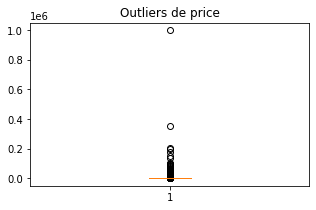

In [37]:
#Diagrama de caja: price.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["price"]) 
plt.title("Outliers de price")
plt.show() #diagrama para visualizar outliers

MINIMUM NIGHTS

In [39]:
#Variable: minimum nigths.

x5=copia["minimum_nights"]

p25x5=x5.quantile(0.25) #Q1
p75x5=x5.quantile(0.75) #Q3
iqrx5 = p75x5 - p25x5 #Q3-Q1

LimiteSuperior_iqr_5 = p75x5 + 1.7*iqrx5
LimiteInferior_iqr_5 = p25x5 - 1.7*iqrx5
print("Limite superior permitido", LimiteSuperior_iqr_5)
print("Limite inferior permitido", LimiteInferior_iqr_5)

Limite superior permitido 6.4
Limite inferior permitido -2.4


In [40]:
#Identificación de Outliers
otlrs_minimum_n_iqr= copia [(x5>LimiteSuperior_iqr_5) | (x5<LimiteInferior_iqr_5)]
otlrs_minimum_n_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,826691.0,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.40915,-99.17321,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
8,45767104.0,BONITO DEPARTAMENTO NUEVO LOMAS DE TECAMACHALCO,371036285,Luis,Desconocido,Miguel Hidalgo,19.41947,-99.24063,Private room,500.0,7.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
16,58955.0,Entire beautiful duplex in la Roma,282620,Laura,Desconocido,CuauhtÃ©moc,19.42113,-99.15955,Entire home/apt,2019.0,7.0,45.0,06/01/2022,0.35,1.0,351.0,3.0
27,70644.0,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Desconocido,CoyoacÃ¡n,19.35448,-99.16217,Entire home/apt,1197.0,7.0,112.0,20/06/2022,0.89,3.0,153.0,8.0
41,187030.0,Spacious apt with the best rooftop in Condesa,899360,Julian,Desconocido,CuauhtÃ©moc,19.41057,-99.17730,Entire home/apt,2142.0,14.0,98.0,28/05/2022,0.76,6.0,171.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,46948276.0,Habitaciones con ambiente tranquilo,379425976,Gisela,Desconocido,Gustavo A. Madero,19.50459,-99.04702,Shared room,210.0,30.0,0.0,31/12/2022,1.60,1.0,365.0,0.0
21594,41901466.0,Alojamiento a 10 minutos de Ã©l Aeropuerto CDMX,325761667,Isaac,Desconocido,Gustavo A. Madero,19.47178,-99.05042,Private room,406.0,10.0,0.0,31/12/2022,1.60,2.0,358.0,0.0
21600,26589089.0,Nueva habitacion en renta,62576597,Lupe,Desconocido,Cuajimalpa de Morelos,19.40953,-99.26700,Private room,500.0,7.0,1.0,08/11/2018,0.02,1.0,173.0,0.0
21628,23056362.0,suite en la herradura la mejor vista,170621268,Carolina,Desconocido,Miguel Hidalgo,19.42308,-99.25948,Private room,317.0,7.0,0.0,31/12/2022,1.60,1.0,90.0,0.0


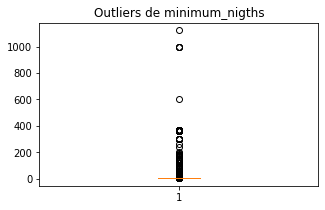

In [41]:
#Diagrama de caja: minimum_nigths.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["minimum_nights"]) 
plt.title("Outliers de minimum_nigths")
plt.show() #diagrama para visualizar outliers

NUMBER OF REVIEWS

In [42]:
#Variable: number_of_reviews.

x6=copia["number_of_reviews"]

p25x6=x6.quantile(0.25) #Q1
p75x6=x6.quantile(0.75) #Q3
iqrx6 = p75x6 - p25x6 #Q3-Q1

LimiteSuperior_iqr_6 = p75x6 + 1.5*iqrx6
LimiteInferior_iqr_6 = p25x6 - 1.5*iqrx6
print("Limite superior permitido", LimiteSuperior_iqr_6)
print("Limite inferior permitido", LimiteInferior_iqr_6)

Limite superior permitido 86.0
Limite inferior permitido -50.0


In [43]:
#Identificación de Outliers
otlrs_number_of_reviews_iqr= copia [(x6>LimiteSuperior_iqr_6) | (x6<LimiteInferior_iqr_6)]
otlrs_number_of_reviews_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9,832805.0,ROOMS CASA INDIGO WITH TERRACE AT CITY CENTER,3777702,Abraham,Desconocido,CuauhtÃ©moc,19.44262,-99.14566,Private room,444.0,1.0,125.0,26/01/2022,1.08,6.0,288.0,2.0
23,883511.0,Cozy House with Roofterrace group 29 pax Cente...,3777702,Abraham,Desconocido,CuauhtÃ©moc,19.44207,-99.14797,Entire home/apt,2827.0,1.0,209.0,06/06/2022,1.83,6.0,249.0,27.0
27,70644.0,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Desconocido,CoyoacÃ¡n,19.35448,-99.16217,Entire home/apt,1197.0,7.0,112.0,20/06/2022,0.89,3.0,153.0,8.0
30,913084.0,15 blocks from Paseo de la Reforma,4647293,Martina,Desconocido,Miguel Hidalgo,19.43956,-99.17263,Entire home/apt,2057.0,2.0,139.0,13/06/2022,1.25,2.0,180.0,27.0
31,165772.0,BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC,790208,Maria Jose,Desconocido,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3837.0,2.0,278.0,30/05/2022,2.09,6.0,231.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,19628292.0,15 min Aeropuerto AutÃ³dromo Palacio de los de...,138094276,Erika,Desconocido,Iztapalapa,19.39794,-99.04350,Private room,350.0,1.0,144.0,13/06/2022,2.54,11.0,361.0,17.0
21431,24064511.0,ð³ï¸âðCLOSE TO AIRPORT & DOWNTOWN @IDE...,160773275,Gonzalo,Desconocido,Gustavo A. Madero,19.46194,-99.05415,Entire home/apt,401.0,2.0,100.0,04/05/2022,1.96,5.0,323.0,11.0
21445,22973104.0,"Depa1 FÃ¡cil Acceso Aeropuerto, Metro,Bosque A...",170284149,Eunice,Desconocido,Gustavo A. Madero,19.45781,-99.05398,Entire home/apt,303.0,1.0,136.0,05/06/2022,2.56,2.0,359.0,24.0
21615,25090111.0,"CÃMODO APARTAMENTO PLANTA ALTA, 20min aeropuerto",127271180,VÃ­ctor,Desconocido,Gustavo A. Madero,19.48893,-99.06681,Entire home/apt,450.0,1.0,158.0,12/05/2022,3.31,1.0,362.0,38.0


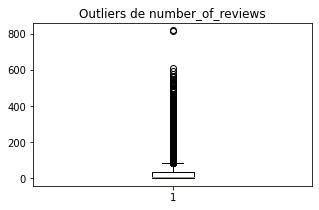

In [44]:
#Diagrama de caja: number_of_reviews.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #diagrama para visualizar outliers

REVIEWS PER MONTH

In [45]:
#Variable: reviews_per_month.

x7=copia["reviews_per_month"]

p25x7=x7.quantile(0.25) #Q1
p75x7=x7.quantile(0.75) #Q3
iqrx7 = p75x7 - p25x7 #Q3-Q1

LimiteSuperior_iqr_7 = p75x7 + 1.5*iqrx7
LimiteInferior_iqr_7 = p25x7 - 1.5*iqrx7
print("Limite superior permitido", LimiteSuperior_iqr_7)
print("Limite inferior permitido", LimiteInferior_iqr_7)

Limite superior permitido 4.005
Limite inferior permitido -1.6349999999999998


In [46]:
#Identificación de Outliers
otlrs_reviews_per_month_iqr= copia [(x7>LimiteSuperior_iqr_7) | (x7<LimiteInferior_iqr_7)]
otlrs_reviews_per_month_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
33,9.397210e+05,Radiant Apartment with Terrace in Roma Norte,4821807,Alex,Desconocido,CuauhtÃ©moc,19.422880,-99.154880,Entire home/apt,1572.0,3.0,458.0,06/06/2022,4.09,4.0,171.0,49.0
36,2.084093e+06,5 min from CDMXÂ´s airport,10644799,Benito,Desconocido,Venustiano Carranza,19.439490,-99.087690,Entire home/apt,446.0,1.0,562.0,28/05/2022,5.92,6.0,354.0,24.0
214,2.863598e+06,"Cozy, sunny room. Located in the heart of CDMX",13793390,Mario,Desconocido,Benito JuÃ¡rez,19.392130,-99.172070,Private room,344.0,2.0,10.0,17/06/2022,5.08,1.0,274.0,10.0
298,3.635953e+06,Nice Loft in the heart of Polanco,18334496,Nando,Desconocido,Miguel Hidalgo,19.432150,-99.188510,Entire home/apt,1620.0,1.0,548.0,17/06/2022,5.70,4.0,76.0,62.0
337,3.849434e+06,"15th floor apartment Roma Norte, Mexico City",10731286,Larren,Desconocido,CuauhtÃ©moc,19.420440,-99.166820,Entire home/apt,1241.0,2.0,348.0,06/06/2022,5.52,2.0,314.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,5.540000e+17,FantÃ¡stico Departamento de 2 Recamaras en Sat...,442065952,Ricardo,Desconocido,Azcapotzalco,19.499702,-99.225136,Entire home/apt,766.0,1.0,25.0,12/06/2022,5.77,79.0,343.0,25.0
21312,5.036232e+07,HabitaciÃ³n confortable en Natura Residencial,406763976,Enrique Alejandro,Desconocido,Azcapotzalco,19.514060,-99.222730,Private room,439.0,1.0,46.0,12/06/2022,4.41,1.0,359.0,46.0
21530,6.230000e+17,Tranquilo departamento con servicios incluidos,191626918,AlÃ­,Desconocido,Azcapotzalco,19.507942,-99.221069,Private room,350.0,1.0,7.0,19/06/2022,5.68,1.0,365.0,7.0
21608,5.440000e+17,"Departamento ""Villada"" en NezahualcÃ³yotl",140057345,Nancy Y Baldemar,Desconocido,Iztapalapa,19.392880,-99.009130,Entire home/apt,326.0,2.0,18.0,11/06/2022,4.19,1.0,333.0,18.0


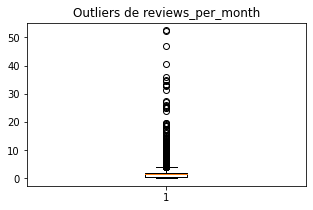

In [47]:
#Diagrama de caja: reviews_per_month.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #diagrama para visualizar outliers

AVAILABILITY 365

In [48]:
#Variable: availability_365.
x8=copia["availability_365"]

p25x8=x8.quantile(0.25) #Q1
p75x8=x8.quantile(0.75) #Q3
iqrx8 = p75x8 - p25x8 #Q3-Q1

LimiteSuperior_iqr_8 = p75x8 + 1.5*iqrx8
LimiteInferior_iqr_8 = p25x8 - 1.5*iqrx8
print("Limite superior permitido", LimiteSuperior_iqr_7)
print("Limite inferior permitido", LimiteInferior_iqr_7)

Limite superior permitido 4.005
Limite inferior permitido -1.6349999999999998


In [49]:
#Identificación de Outliers
otlrs_availability_365_iqr= copia [(x8>LimiteSuperior_iqr_8) | (x8<LimiteInferior_iqr_8)]
otlrs_availability_365_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15,2056638.0,Amplio y luminoso loft en CoyoacÃ¡n,10531228,Maria,Desconocido,CoyoacÃ¡n,19.35353,-99.16299,Entire home/apt,1602.0,1.0,21.0,24/06/2018,0.2,3.0,1290.0,0.0


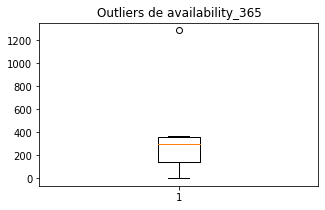

In [50]:
#Diagrama de caja: availability_365.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #diagrama para visualizar outliers

SUSTITUCIÓN DE OUTLIERS

In [51]:
#Primera sustitución: latitude.
#Método: desviación estándar
data3=copia[(reto2<=limitesuperior)&(reto2>=limiteinferior)]
data3["latitude"]=data3["latitude"].fillna(round(copia["latitude"].mean(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/4287624442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["latitude"]=data3["latitude"].fillna(round(copia["latitude"].mean(),1))


In [52]:
#Segunda sustitución: longitude.
#Método: desviación estándar
data3=copia[(r3<=limitesuperior2)&(r3>=limiteinferior2)]
data3["longitude"]=data3["longitude"].fillna(round(data2["longitude"].mean(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/403934490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["longitude"]=data3["longitude"].fillna(round(data2["longitude"].mean(),1))


In [70]:
#Tercera sustitución: price.
#Método: desviación estándar
data3=data2[(r4<=limitesuperior3)&(x3>=limiteinferior3)] 
data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/1891671556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))


In [71]:
#Cuarta sustitución: minimum_nights
#Método: desviación estándar
data3=copia[(r5<=limitesuperior4)&(r5>=limiteinferior4)]
data3["minimum_nights"]=data3["minimum_nights"].fillna(round(copia["minimum_nights"].mode(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/3111194663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["minimum_nights"]=data3["minimum_nights"].fillna(round(copia["minimum_nights"].mode(),1))


In [72]:
#Quinta variable: number_of_reviews
#Método: desviación estándar
data3=copia[(r6<=limitesuperior5)&(r6>=limiteinferior5)]
data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(copia["number_of_reviews"].median(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/3574062418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(copia["number_of_reviews"].median(),1))


In [73]:
#Sexta variable: reviews_per_month
#Método: desviación estándar
data3=copia[(r7<=limitesuperior6)&(r7>=limiteinferior6)]
data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(copia["reviews_per_month"].median(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/132970772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(copia["reviews_per_month"].median(),1))


In [74]:
#Sexta variable: availability_365
#Método: rango intercuartílico
data3=copia[(x8<=LimiteSuperior_iqr_8)&(x8>=LimiteInferior_iqr_8)]
data3["availability_365"]=data3["availability_365"].fillna(round(copia["availability_365"].median(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_11175/2689577475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["availability_365"]=data3["availability_365"].fillna(round(copia["availability_365"].median(),1))


In [75]:
#Convertir DataFrame a CSV
data3.to_csv('Airbnb_limpio.csv')